# Gradient Boosting Machines (GBM)

Hatalar/artıklar üzerine tek bir tahminsel model formunda olan modeler serisi kurulur. İteratif olarak hataları azaltacak şekilde ağaç optimizasyonu yapılır. Gradient Descent'in Boosting yöntemine uyarlandığı haldir. Burada ağaçlar birbirlerine bağımlıdır. 

Özetle boosting yöntemlerinin gradient descent ile optimize edilmesi işidir. 

- Boosting + Gradient Descent

- Gradient boosting tek bir tahminsel model formunda olan modeller serisi oluşturur.

- Seri içerisindeki bir model serideki bir önceki modelin tahmin artıklarının/hatalarının (residuals) üzerine kurularak (fit) oluşturulur.

- GBM diferansiyellenebilen herhangi bir kayıp fonksiyonunu optimize edebilen Gradient descent algoritmasını kullanmaktadır.

- Tek bir tahminsel model formunda olan modeller serisi additive şekilde kurulur.

### Additive Modeling

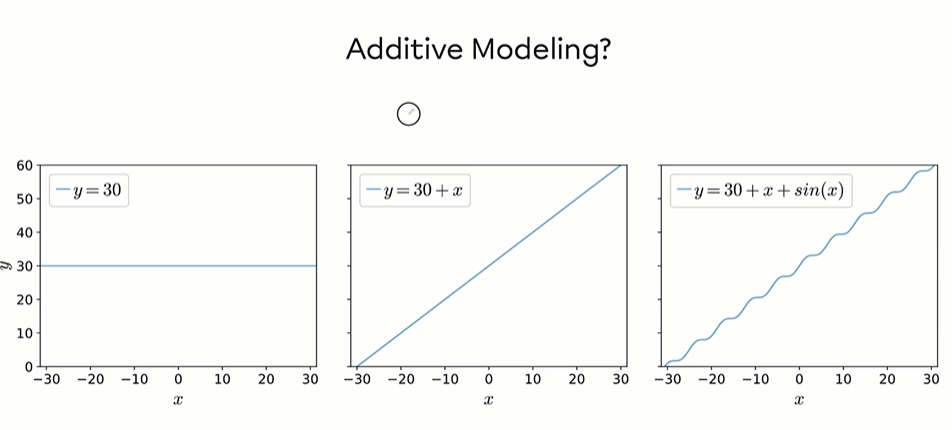

Additive modeling, sabit fonksiyonlara başka değişkenlerin eklenmesiyle fonksiyonun yapısını değiştirmektir. Yukarıdaki örneklerde ilk grafikde y=30'dur. x'den bağımsızdır. İkinci grafikte y değişkenine bir de x ekleyerek y değişkeninin x'e bağlı olmasını sağladık. Üçüncü grafik de ise x'in y üzerinde daha fazla etki etmesi için sin(x) ekledik (x^2, x^3, cos(x) vs de eklenebilir).

İşte burada y değişkenine eklediğimiz x değişkeni artıktır. GBM yönteminde oluşturduğumuz modele, o modelden oluşan hatalardan (artıklardan) yeni bir model oluşturarak oradan elde edilen tahminlerin eklenmesiyle, modelimizin başarısını arttırmaya çalışırız.

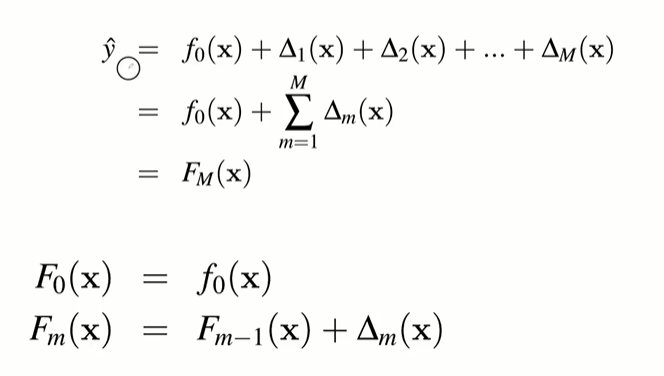

Yukarıdaki denklemler ile bu yöntem uygulanır. En üstteki y denkleminde f0(x) bizim ilk oluşturduğumuz modeldir. Δ1(x), ilk modelimizden elde ettiğimiz hatalarla (artıklarla - gerçek değerler ile tahmin değerlerinin farkları) bağımsız değişkenler arasında yeniden oluşturduğumuz modelin tahminleridir. Sırası ile iteratif bir şekilde ilerleyerek her oluşturulan modelin hataları (gerçek değerler ile tahmin değerlerinin farkları), bağımsız değişkenler ile modellenerek yeni tahminler elde edilir. Bunlar da Δ ile ifade edilir. 

F0(x) bizim ilk modelimizi yani *base learnerı* (f0(x)) ifade etmektedir. Ondan sonraki her modelde, örneğin F1(x), bir önceki modele, *artık modelin* (Δm(x)) eklenmesiyle kurulur.

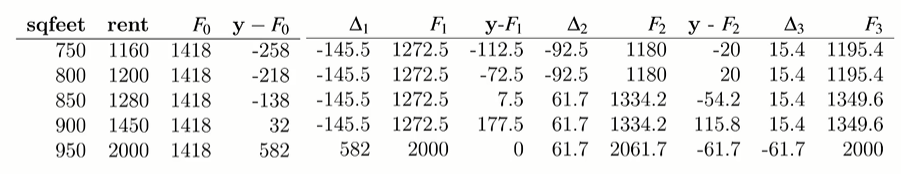

Yukarıdaki örneği inceleyelim. F0 bizim ilk modelimiz (ilk tahminlerimiz). Sabittir, rent değerlerinin ortalamaları alınarak oluşturulmuştur. Sonrasında bu modelin hatasını hesaplamamız gerekir. Bu da gerçek değerler ile tahmin değerlerinin farkı alınarak yapılır (gradient descent). y-F0 ile gösterilen sütun ilk modelimiz için hata değerleridir (artıklardır). Bu değerler artık bizim yeni bağımlı değişkenimiz olacaktır (y1). Yeni modelimizi bu yeni bağımlı değişken ve eski bağımsız değişkenimiz ile kuracağız. Burada bağımsız değişkenimizi parça parça hesaplayarak en düşük SSE değerini veren noktadan ayırma işlemi yaparız (sqfeet 950 noktasından). Ayırma işlemini yaptıktan sonra oluşturduğumuz artık modelde yeni artık model tahminlerimiz Δ1 sütunudur. Eski tahminler ile yeni tahminlerimizin toplamı, bize yeni modelimizi verecektir (F1 = F0 + Δ1). F1 sütunu bize yeni tahminlerimizi gösterir. Bu bizim birinci artık modelli modelimizdir. 

Bir iterasyon daha yapalım. Bu noktada artık bizim yeni tahmin değerlerimiz F1'dir. Yeni oluşturduğumuz modelin hatalarını hesaplamak için tekrardan gerçek değerler ile tahmin değerlerinin farkını alırız. y-F1 sütunu, F1 tahminlerinin hatalarını göstermektedir. Bu değerler bizim yeni artıklarımızdır. Yani bunlar bizim ikinci bağımlı değişkenlerimiz olacaktır (y2). Şimdi bu yeni bağımlı değişken ile bağımsız değişkei modelleyeceğiz. Burada da yine bağımsız değişkenin gözlemlerini tek tek deneyerek SSE değerleri hesaplanır. En düşük SSE değerine sahip noktadan (850) ayırma işlemi yapılır. Bu modeli oluşturduktan sonra elde ettiğimiz artık tahminler Δ2'dir. Artık tahminlerini bulduktan sonra asıl tahminleri hesaplamak için önceki tahminlerle bu artık tahminleri toplamamız gerekiyordu (F2 = F1 + Δ2). Yukarıdaki F2 sütunu bizim ikinci artık modelli modelimizdir ve ilk modelimize göre daha isabetli tahminler gerçekleştirmiştir.

*Gradient Descent bu işlemlerin neresinde?*

Gerçek değerler ile tahmin değerlerinin farklarını alarak gradient descent işlemi uygulamış oluyoruz. Gradient descent'de bir de learning rate ifadesi vardı. Burada learning rate'i 1 olarak kabul ediyoruz.

Yukarıdaki işlemleri grafik üzerinde gösterecek olursak:

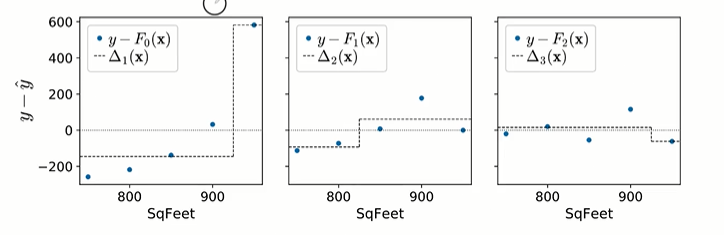

İlk grafik ilk artık modelini (y-F0) göstermekte. Gözlemlenceği üzere artıkların (gerçek değer - tahmin edilen değer) her bir iterasyonda minimize olmuş. İlk iterasyonda artıkların arasındaki farklar yüksekken, son iterasyonda tüm artıklar birbirlerine yakındır. Yani artıklar optimize edilerek küçültülmüş, hatalar küçültülmüş. 

## GBM Uygulama 

Data Preprocessing, Feature Engineering gibi adımları atlıyoruz. Direkt hiperparametre optimizasyonu ile başlayacağız. Daha sonrasında tüm işlemlerinde yapıldığı detaylı bir çalışma yapılabilir.

In [3]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_validate, RandomizedSearchCV, validation_curve

warnings.simplefilter(action='ignore', category=Warning)

# from xgboost import XGBClassifier
# !pip install lightgbm
# from lightgbm import LGBMClassifier
# !pip install catboost
# from catboost import CatBoostClassifier

In [4]:
df = pd.read_csv("datasets/diabetes.csv")

In [5]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

### GBM

In [6]:
gbm_model = GradientBoostingClassifier(random_state=17)

İşlemlere başlamadan önce modelimizin parametrelerine ve hiperparametre optimizasyon işlemlerinden önceki hata değerlerimize bakalım.

In [7]:
gbm_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': 17,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [10]:
cv_results = cross_validate(gbm_model, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])
print("Accuracy: ", cv_results["test_accuracy"].mean())
print("F1: ", cv_results["test_f1"].mean())
print("ROC-AUC: ", cv_results["test_roc_auc"].mean())

Accuracy:  0.7591715474068416
F1:  0.634235802826363
ROC-AUC:  0.8253015373864429


Şimdi gbm için test etmek istediğimiz parametre setini bir sözlük yapısında girmemiz gerekiyor.

In [12]:
gbm_params = {"learning_rate": [0.01, 0.1],
             "max_depth": [3, 8, 10],
             "n_estimators": [100, 500, 1000],
             "subsample": [1, 0.5, 0.7]}

In [13]:
gbm_best_grid = GridSearchCV(gbm_model, gbm_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  7.9min finished


In [15]:
gbm_best_grid.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.7}

Modelimiz için en verimli parametre değerlerimizi bulduk. Şimdi bu parametreler ile final bir model kuralım.

In [16]:
gbm_final = gbm_model.set_params(**gbm_best_grid.best_params_, random_state=17).fit(X, y)

Final modelimizi en iyi parametreler ile kurduk. Şimdi son olarak final modelimizin hatalarını hesaplayıp önceki modelimiz ile kıyaslayalım.

In [17]:
cv_results = cross_validate(gbm_final, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])
print("Accuracy: ", cv_results["test_accuracy"].mean())
print("F1: ", cv_results["test_f1"].mean())
print("ROC-AUC: ", cv_results["test_roc_auc"].mean())

Accuracy:  0.7734827264239028
F1:  0.6608618893832223
ROC-AUC:  0.8347533193570928
